In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

import tensorflow.keras.utils as ku 
from urllib.request import urlopen
import numpy as np 

In [16]:
tokenizer = Tokenizer()

url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt"
data = urlopen(url).read().decode('utf-8')
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [19]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 3211)              324311    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              10313732  
Total params: 11,420,743
Trainable params: 11,420,743
Non-trainable params: 0
__________________________________________

In [20]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 72s 5ms/sample - loss: 6.8851 - accuracy: 0.0220
Epoch 2/100
15462/15462 [==============================] - 72s 5ms/sample - loss: 6.4991 - accuracy: 0.0213
Epoch 3/100
15462/15462 [==============================] - 77s 5ms/sample - loss: 6.3934 - accuracy: 0.0256
Epoch 4/100
15462/15462 [==============================] - 73s 5ms/sample - loss: 6.2673 - accuracy: 0.0316
Epoch 5/100
15462/15462 [==============================] - 72s 5ms/sample - loss: 6.1631 - accuracy: 0.0368
Epoch 6/100
15462/15462 [==============================] - 73s 5ms/sample - loss: 6.0779 - accuracy: 0.0391
Epoch 7/100
15462/15462 [==============================] - 82s 5ms/sample - loss: 5.9947 - accuracy: 0.0418
Epoch 8/100
15462/15462 [==============================] - 74s 5ms/sample - loss: 5.8937 - accuracy: 0.0474
Epoch 9/100
15462/15462 [==============================] - 78s 5ms/sample - loss: 5.7790 - accuracy: 0.0563
Epoch

15462/15462 [==============================] - 69s 4ms/sample - loss: 1.1791 - accuracy: 0.8016
Epoch 76/100
15462/15462 [==============================] - 67s 4ms/sample - loss: 1.1452 - accuracy: 0.8055
Epoch 77/100
15462/15462 [==============================] - 69s 4ms/sample - loss: 1.1426 - accuracy: 0.8088
Epoch 78/100
15462/15462 [==============================] - 69s 4ms/sample - loss: 1.1351 - accuracy: 0.8075
Epoch 79/100
15462/15462 [==============================] - 75s 5ms/sample - loss: 1.1203 - accuracy: 0.8107
Epoch 80/100
15462/15462 [==============================] - 70s 5ms/sample - loss: 1.1009 - accuracy: 0.8141
Epoch 81/100
15462/15462 [==============================] - 71s 5ms/sample - loss: 1.0857 - accuracy: 0.8142
Epoch 82/100
15462/15462 [==============================] - 70s 5ms/sample - loss: 1.0658 - accuracy: 0.8194
Epoch 83/100
15462/15462 [==============================] - 74s 5ms/sample - loss: 1.0450 - accuracy: 0.8230
Epoch 84/100
15462/15462 [======

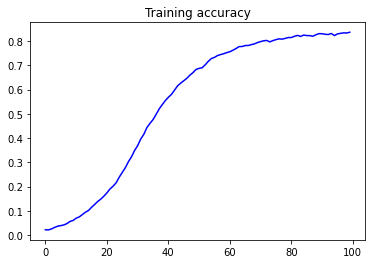

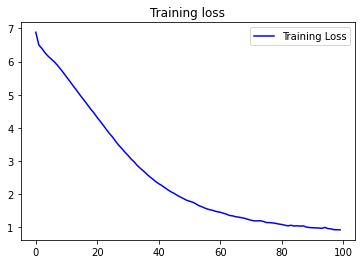

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [22]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope well up stay lie of such cross cross or youth still hence find their crime best can shine 'no ' not bright go 'tis on me had forsaken away alone please another's triumph part ' do most abide abide give bright decay store in sweetest crime weeds forth men increase spent must go shown dearer must prove say wrong prove decay store their store decrease crime crime dyed away away both shown brought to go from pleasure their gone within his store room decrease another age in rest weeds men increase increase shown hate well must must go twain crime
